# Estatística no Python

Importaremos os seguintes módulos para gerar variáveis aleatórias, fazer testes estatísticos e plotar gráficos, respectivamente.

In [1]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt

## Normal

Plotando o histograma de uma amostra aleatória de distribuição normal  $\mu = 0$ e  $\sigma = 1$ junto a sua curva de densidade.

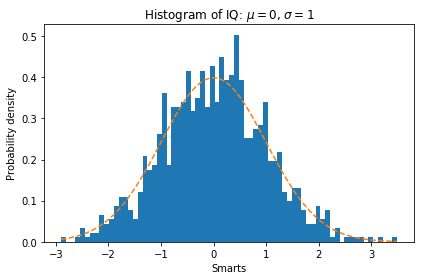

In [2]:
np.random.seed(30)
sample = np.random.normal(0,1,1000)

fig, ax = plt.subplots()

n, bins, patches = ax.hist(sample, 
                           bins=70,
                           density=1)

y = ((1 / (np.sqrt(2 * np.pi) * 1)) *
     np.exp(-0.5 * (1 / 1 * (bins - 0))**2)) # Densidade de uma normal 0,1

ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=0$, $\sigma=1$')

fig.tight_layout()
plt.show()

Realizando teste shapiro para normalidade.

In [3]:
teste = sp.shapiro(sample)
print("Estatística de teste = ", teste[0],
    "\nP-valor = ", teste[1])

Estatística de teste =  0.9988949298858643 
P-valor =  0.8143659234046936


Pelo P-valor não rejeitamos a hipótese nula, acreditamos que a amostra possua distribuição normal.

## Diferença de media de  duas populações com $\sigma$ desconhecido

Plotando o histograma de duas amostras aleatórias: $$X \sim Exp(1)$$ $$Y \sim \chi_{3}$$ 

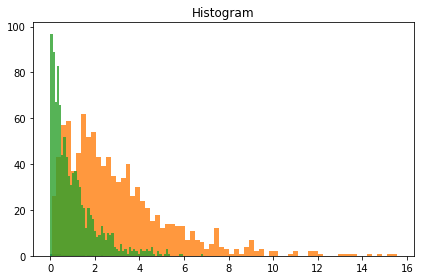

In [4]:
np.random.seed(30)
sample_exp = np.random.exponential(1,1000)
sample_chisquare = np.random.chisquare(3, 1000)

fig, ax = plt.subplots()

n, bins, patches = ax.hist(sample_exp, 
                           bins=70,
                           density=1)

ax.hist(sample_chisquare, bins=70, alpha = 0.8)
ax.hist(sample_exp, bins=70, alpha = 0.8)

ax.set_title(r'Histogram')

fig.tight_layout()
plt.show()

Calculando as médias das duas amostras

In [5]:
print(sample_exp.mean())
print(sample_chisquare.mean())

1.0291624091050962
2.989692252273868


Calculando as variâncias

In [6]:
print(sample_exp.var())
print(sample_chisquare.var())

1.084637140973404
5.807226861989522


Relizando teste de hipótse para diferença de variâncias usando levene.

In [7]:
sp.levene(sample_exp, 
          sample_chisquare)

LeveneResult(statistic=261.0632253020813, pvalue=2.7476660148769317e-55)

Realizando teste de hipótese para diferença de médias e variâncias diferentes.

In [8]:
sp.ttest_ind(sample_exp, 
             sample_chisquare, 
             equal_var=False)

Ttest_indResult(statistic=-23.604122081348265, pvalue=1.6103747107205958e-103)